In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.shape

(5110, 12)

# Data Exploration and Feature Engineering

In [5]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

bmi has many null values. We will need to do something about this. We can fill it with the median/mean

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Categorical and Numerical Variables

In [9]:
categorical_mask = (data.dtypes=='object')
categorical_columns = data.columns[categorical_mask].tolist()
categorical_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [10]:
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [11]:
categorical_threshold = 3
num_but_cat = [col for col in data.columns if data[col].nunique() < categorical_threshold and
                   data[col].dtypes != "O"]
num_but_cat

['hypertension', 'heart_disease', 'stroke']

# Visualization of Categorical Variables

<AxesSubplot:xlabel='stroke', ylabel='count'>

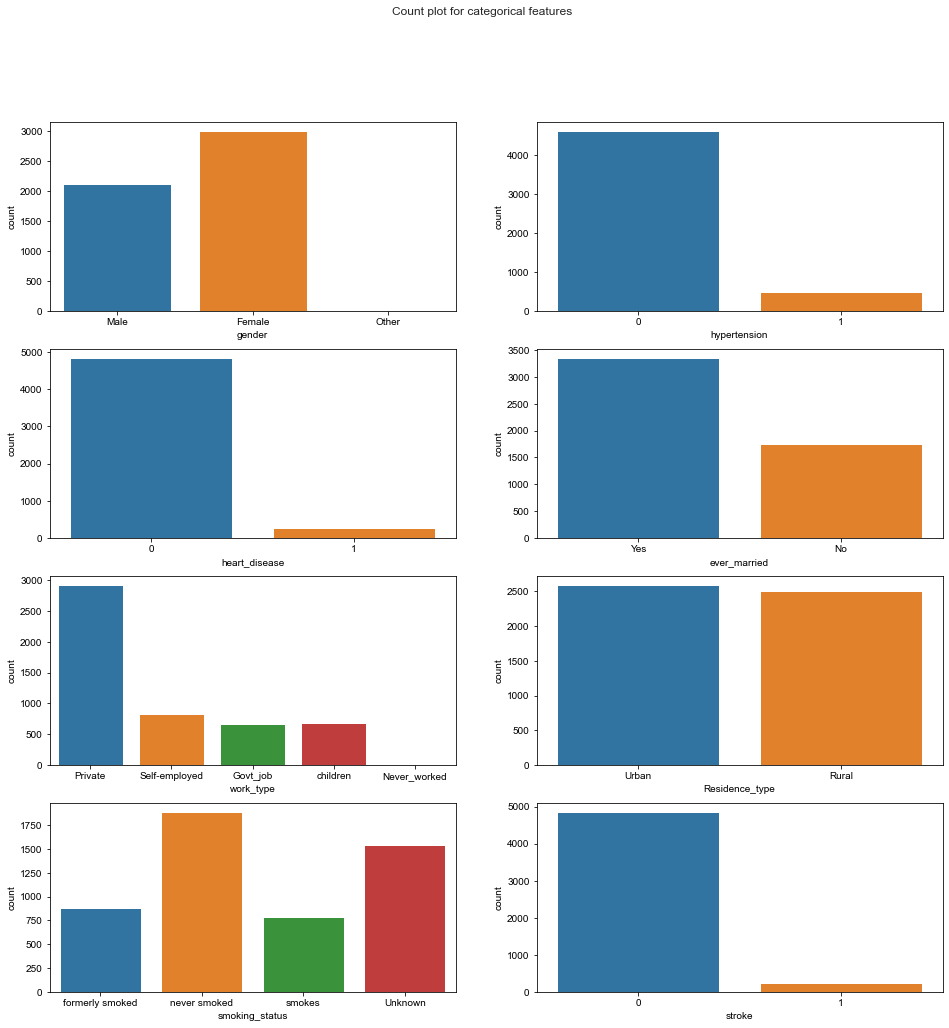

In [12]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('darkgrid')
fig.suptitle("Count plot for categorical features")

sns.countplot(ax=axes[0,0],data=data,x='gender')
sns.countplot(ax=axes[0,1],data=data,x='hypertension')
sns.countplot(ax=axes[1,0],data=data,x='heart_disease')
sns.countplot(ax=axes[1,1],data=data,x='ever_married')
sns.countplot(ax=axes[2,0],data=data,x='work_type')
sns.countplot(ax=axes[2,1],data=data,x='Residence_type')
sns.countplot(ax=axes[3,0],data=data,x='smoking_status')
sns.countplot(ax=axes[3,1],data=data,x='stroke')

In [13]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# Analysing Categorical Variables with Stroke

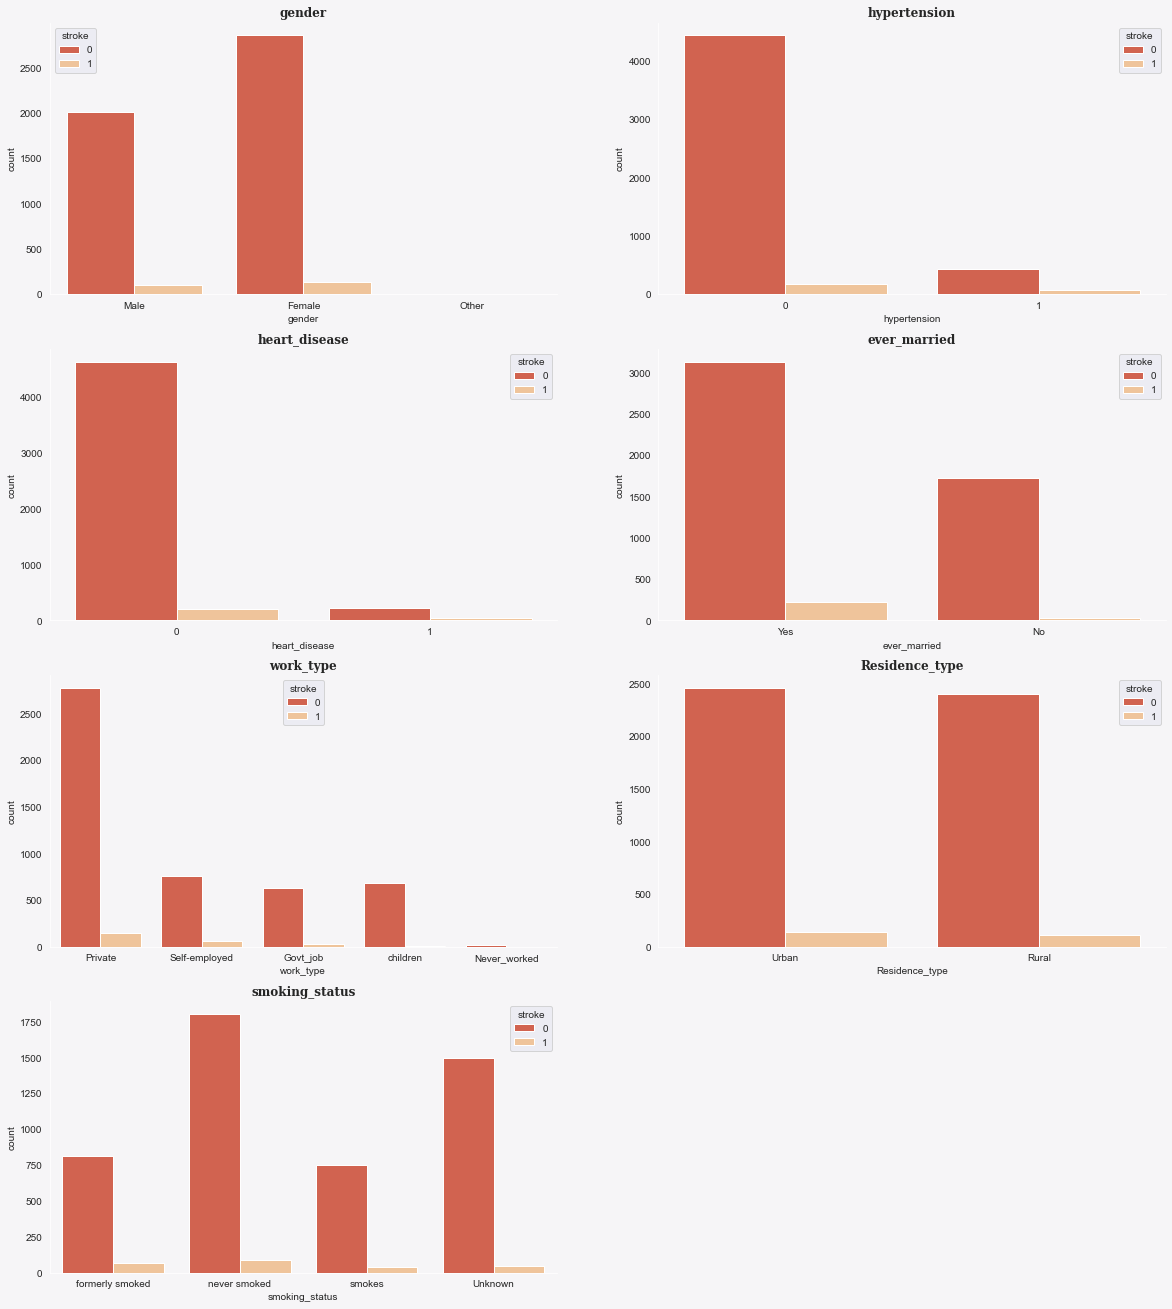

In [14]:

data_cat=data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status']]
fig=plt.figure(figsize=(20,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_cat.columns):
    ax=plt.subplot(4,2,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val,fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(x=data_cat[val],palette='OrRd_r',hue=data['stroke'])

# Preprocessing

In [119]:
data_train = data.copy()
data_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [120]:
data_train['bmi'] = data_train['bmi'].fillna(data_train['bmi'].mean())
data_train.drop(columns=['id'], inplace=True)

In [121]:
data_train.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Binary Encoding

In [122]:
binary_cols = [col for col in data.columns if data[col].dtype == "O"
               and data[col].nunique() == 2]
# binary_cols

def label_encoder(df):
    for i in binary_cols:
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])
    return df

data_train = label_encoder(data_train)

In [123]:
data_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


# Categorical Encoding

In [124]:
# 1st method
cat_cols = ['smoking_status','work_type', 'gender']
data_dummies = data[['smoking_status','work_type', 'gender']]
data_dummies=pd.get_dummies(data_dummies)
data_train.drop(columns=cat_cols,inplace=True)
data_train = data_train.merge(data_dummies, left_index=True, right_index=True, how='left')
data_train.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Female,gender_Male,gender_Other
0,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,0,0,1,0,0,0,1,0
1,61.0,0,0,1,0,202.21,28.893237,1,0,0,1,0,0,0,0,1,0,1,0,0
2,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,1,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.400000,1,0,0,0,1,0,0,1,0,0,1,0,0
4,79.0,1,0,1,0,174.12,24.000000,1,0,0,1,0,0,0,0,1,0,1,0,0


# Split into Train and Test set

In [125]:
X=data_train.drop(['stroke'],axis=1)
y=data_train['stroke']

In [126]:
from sklearn.model_selection import train_test_split # split data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [127]:
print("Number transactions x_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions x_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions x_train dataset:  (4088, 19)
Number transactions y_train dataset:  (4088,)
Number transactions x_test dataset:  (1022, 19)
Number transactions y_test dataset:  (1022,)


# Feature Scaling

In [128]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [129]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_balanced, y_train_balanced = smote.fit_resample(X_train, Y_train)

In [156]:
def show_measurability(y_test, y_pred):
    print('Accuracy:', round(accuracy_score(Y_test, y_pred), 2))
    print('Precision',round(precision_score(Y_test,y_pred), 2))
    print('Recall',recall_score(Y_test,y_pred))
    print('F1 score',f1_score(Y_test,y_pred))
    print('ROC score',roc_auc_score(Y_test,y_pred))

In [158]:
from sklearn.metrics import plot_confusion_matrix
def show_confusion_matrix_plot(classifier_object, x_test, y_test):
    color = 'Black'
    matrix = plot_confusion_matrix(classifier_object, x_test, y_test, cmap=plt.cm.Reds)
    matrix.ax_.set_title('Confusion Matrix', color=color)
    plt.xlabel('Predicted Label', color=color)
    plt.ylabel('True Label', color=color)
    plt.gcf().axes[0].tick_params(colors=color)
    plt.gcf().axes[1].tick_params(colors=color)
    plt.show()

# Classifier Models

## Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=22)
lr.fit(x_train_balanced, y_train_balanced)
y_pred_lr = lr.predict(X_test)

Accuracy: 0.75
Precision 0.18
Recall 0.8225806451612904
F1 score 0.28895184135977336
ROC score 0.7862903225806452


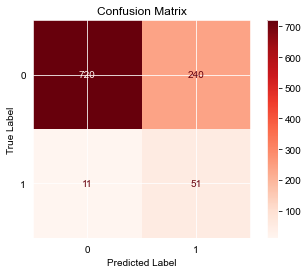

In [159]:
show_measurability(Y_test, y_pred_lr)
show_confusion_matrix_plot(lr, X_test, Y_test)

## Support Vector Machine

In [160]:
from sklearn.svm import SVC, LinearSVC
svm_classifier = SVC(random_state= 22, probability = True) #rbf is gaussian kernel based on radial basis function.
svm_classifier.fit(x_train_balanced, y_train_balanced)
y_pred_svm = svm_classifier.predict(X_test)

Accuracy: 0.82
Precision 0.16
Recall 0.46774193548387094
F1 score 0.23577235772357724
ROC score 0.6531418010752688


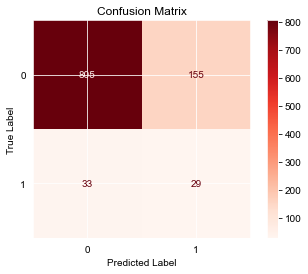

In [161]:
show_measurability(Y_test, y_pred_svm)
show_confusion_matrix_plot(svm_classifier, X_test, Y_test)

## Decision Tree

In [135]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(random_state=22)
decision_tree_classifier.fit(x_train_balanced, y_train_balanced)
y_pred_decision_tree_classifier = decision_tree_classifier.predict(X_test)

Accuracy: 0.87
Precision 0.19
Recall 0.3225806451612903
F1 score 0.2380952380952381
ROC score 0.6164986559139785


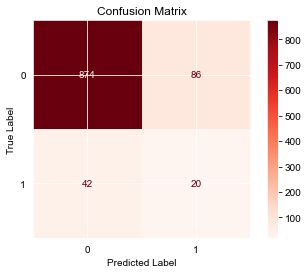

In [162]:
show_measurability(Y_test, y_pred_decision_tree_classifier)
show_confusion_matrix_plot(decision_tree_classifier, X_test, Y_test)

## Random Forest Classifier

In [137]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=22 , max_depth= 5)
rfc.fit(x_train_balanced, y_train_balanced)
y_pred_rfc = rfc.predict(X_test)

Accuracy: 0.74
Precision 0.16
Recall 0.7903225806451613
F1 score 0.2677595628415301
ROC score 0.7623487903225806


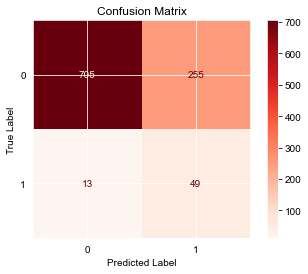

In [163]:
show_measurability(Y_test, y_pred_rfc)
show_confusion_matrix_plot(rfc, X_test, Y_test)